In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
import time
from datetime import datetime

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1600)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1600)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

630

In [5]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval        ")
print("--------------------------------")

# Create counters

record_count = 1
set_count =1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval        
--------------------------------
Processing Record 1 of Set 1 | denpasar
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | lata
Processing Record 4 of Set 1 | yulara
Processing Record 5 of Set 1 | thessalon
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | lagoa
Processing Record 8 of Set 1 | kaitangata
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | barbar
City not found. Skipping...
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | pangody
Processing Record 15 of Set 1 | kununurra
Processing Record 16 of Set 1 | lockport
Processing Record 17 of Set 1 | saint-philippe
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | kodiak
Processing Record 20 of Set 1 | limbe
Processing Record 21 of Set 1 | touros
Processing Record 22 of Set 1 | qaanaaq
Processing Record 23 o

Processing Record 40 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 41 of Set 4 | sorland
Processing Record 42 of Set 4 | laguna
Processing Record 43 of Set 4 | port-gentil
Processing Record 44 of Set 4 | ucluelet
Processing Record 45 of Set 4 | dingle
Processing Record 46 of Set 4 | aklavik
Processing Record 47 of Set 4 | staryy nadym
Processing Record 48 of Set 4 | rawson
Processing Record 49 of Set 4 | makat
Processing Record 50 of Set 4 | salento
Processing Record 1 of Set 5 | darhan
Processing Record 2 of Set 5 | alofi
Processing Record 3 of Set 5 | alghero
Processing Record 4 of Set 5 | luderitz
Processing Record 5 of Set 5 | jalu
Processing Record 6 of Set 5 | santa maria
Processing Record 7 of Set 5 | george
Processing Record 8 of Set 5 | sao joao da barra
Processing Record 9 of Set 5 | jimbolia
Processing Record 10 of Set 5 | vao
Processing Record 11 of Set 5 | rocky mountain house
Processing Record 12 of Set 5 | berlevag
Processing Record 13 of Set 5 | thomp

Processing Record 26 of Set 8 | muisne
Processing Record 27 of Set 8 | kokorevka
Processing Record 28 of Set 8 | mehamn
Processing Record 29 of Set 8 | serafimovich
Processing Record 30 of Set 8 | zhuanghe
Processing Record 31 of Set 8 | mergui
City not found. Skipping...
Processing Record 32 of Set 8 | chifeng
Processing Record 33 of Set 8 | grand gaube
Processing Record 34 of Set 8 | karratha
Processing Record 35 of Set 8 | adrar
Processing Record 36 of Set 8 | fort nelson
Processing Record 37 of Set 8 | knysna
Processing Record 38 of Set 8 | samusu
City not found. Skipping...
Processing Record 39 of Set 8 | plastun
Processing Record 40 of Set 8 | kontagora
Processing Record 41 of Set 8 | ketchikan
Processing Record 42 of Set 8 | bambanglipuro
Processing Record 43 of Set 8 | chuchkovo
Processing Record 44 of Set 8 | padang
Processing Record 45 of Set 8 | hervey bay
Processing Record 46 of Set 8 | almeirim
Processing Record 47 of Set 8 | espinosa
Processing Record 48 of Set 8 | aykhal

Processing Record 13 of Set 12 | portoferraio
Processing Record 14 of Set 12 | sumbawa
City not found. Skipping...
Processing Record 15 of Set 12 | acapulco
Processing Record 16 of Set 12 | barawe
City not found. Skipping...
Processing Record 17 of Set 12 | mahibadhoo
Processing Record 18 of Set 12 | yambio
Processing Record 19 of Set 12 | brigantine
Processing Record 20 of Set 12 | yar-sale
Processing Record 21 of Set 12 | ostersund
Processing Record 22 of Set 12 | galveston
Processing Record 23 of Set 12 | hokitika
Processing Record 24 of Set 12 | auka
Processing Record 25 of Set 12 | teguldet
Processing Record 26 of Set 12 | storm lake
Processing Record 27 of Set 12 | sal rei
Processing Record 28 of Set 12 | grand centre
City not found. Skipping...
Processing Record 29 of Set 12 | stoyba
City not found. Skipping...
Processing Record 30 of Set 12 | pangoa
Processing Record 31 of Set 12 | husavik
Processing Record 32 of Set 12 | belyy yar
Processing Record 33 of Set 12 | gushikawa
Pro

In [6]:
len(city_data)


568

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Denpasar,-8.6500,115.2167,82.06,88,20,5.75,ID,2022-05-07 23:53:15
1,Albany,42.6001,-73.9662,54.25,42,100,1.99,US,2022-05-07 23:48:49
2,Lata,40.1629,-8.3327,60.08,62,100,2.30,PT,2022-05-07 23:51:12
3,Yulara,-25.2406,130.9889,51.64,46,0,12.66,AU,2022-05-07 23:53:16
4,Thessalon,46.2501,-83.5666,52.09,57,20,5.28,CA,2022-05-07 23:53:16
5,New Norfolk,-42.7826,147.0587,55.92,71,91,4.29,AU,2022-05-07 23:49:04
6,Lagoa,39.0500,-27.9833,60.22,73,57,4.92,PT,2022-05-07 23:53:17
7,Kaitangata,-46.2817,169.8464,56.48,90,100,2.26,NZ,2022-05-07 23:51:43
8,Yellowknife,62.4560,-114.3525,36.12,100,100,21.85,CA,2022-05-07 23:51:54
9,Ushuaia,-54.8000,-68.3000,47.86,49,20,18.41,AR,2022-05-07 23:48:50


In [8]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Denpasar,ID,2022-05-07 23:53:15,-8.6500,115.2167,82.06,88,20,5.75
1,Albany,US,2022-05-07 23:48:49,42.6001,-73.9662,54.25,42,100,1.99
2,Lata,PT,2022-05-07 23:51:12,40.1629,-8.3327,60.08,62,100,2.30
3,Yulara,AU,2022-05-07 23:53:16,-25.2406,130.9889,51.64,46,0,12.66
4,Thessalon,CA,2022-05-07 23:53:16,46.2501,-83.5666,52.09,57,20,5.28
5,New Norfolk,AU,2022-05-07 23:49:04,-42.7826,147.0587,55.92,71,91,4.29
6,Lagoa,PT,2022-05-07 23:53:17,39.0500,-27.9833,60.22,73,57,4.92
7,Kaitangata,NZ,2022-05-07 23:51:43,-46.2817,169.8464,56.48,90,100,2.26
8,Yellowknife,CA,2022-05-07 23:51:54,62.4560,-114.3525,36.12,100,100,21.85
9,Ushuaia,AR,2022-05-07 23:48:50,-54.8000,-68.3000,47.86,49,20,18.41


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

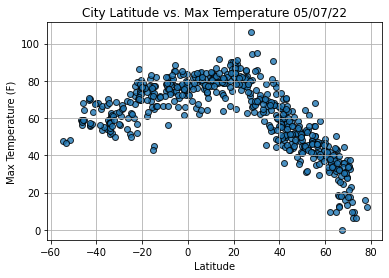

In [10]:
# Extract relevant fields fromt the DataFrame for plotting.

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Import time module
import time

# Build the scatter plot for latitude vs. max temp.

plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()


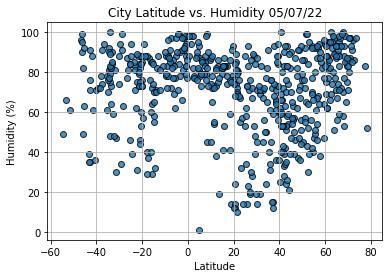

In [11]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

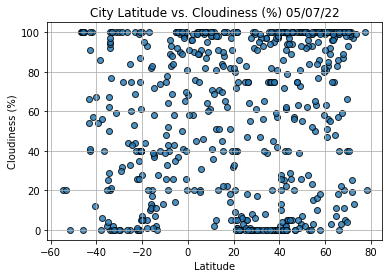

In [12]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

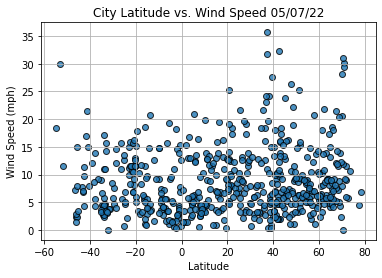

In [13]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()